In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ln -s /content/gdrive/MyDrive/ /mydrive
!ls /mydrive

/mydrive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd ..

/


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Network Final Project

/content/drive/MyDrive/Colab Notebooks/Network Final Project


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
import json
import os
import glob
import networkx as nx
from networkx.algorithms import community
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
jobs_excel=pd.read_excel('fossil_fuel.xlsx')

In [ ]:
jobs_titles=[]
for jobs in jobs_excel['Fossil Fuel Related Jobs']:
  jobs_titles.append(jobs)
for jobs in jobs_excel['Green Jobs']:
  jobs_titles.append(jobs)

In [ ]:
# jobs_titles

In [ ]:
jobs_list = [x for x in jobs_titles if str(x) != 'nan']

In [ ]:
jobs_list[14]

'Sailors and Marine Oilers'

In [ ]:
csv=pd.read_csv('skills_jobs_csv/Auditory_Attention.csv')

In [ ]:
%cd skills_jobs_csv

/content/drive/MyDrive/Colab Notebooks/Network Final Project/skills_jobs_csv


In [ ]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [ ]:
len(csv_files)

52

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
df = pd.read_csv("Arm-Hand_Steadiness.csv")
# print(df['Occupation'][0])
# print(jobs_list[0])
# print(type(df['Level'][0]))
# print(type("Not relevant"))
a=[]
for job in jobs_list:
  b=df.loc[df['Occupation'] == job]
  
  a.append(b.iloc[0]['Importance'])
print(a)


[69, 53, 75, 0, 69, 50, 50, 53, 50, 72, 0, 66, 72, 56, 66, 60, 35, 53, 44, 60, 44, 44, 25, 50, 47, 50, 0, 56, 31, 25, 50, 53, 35, 10, 25, 66, 0, 38, 53]


In [ ]:
for f in csv_files:
  print((f.split("/")[-1]).split(".")[0])

In [ ]:
def create_onet_j_s(csv_files):

    if not os.path.isfile('onet_j_s.json'): # create onet file if doesn't exist
      onet_j_s = {}
      for f in csv_files:
        df = pd.read_csv(f)
        importance_score=[]
        for job in jobs_list:
          row=df.loc[df['Occupation'] == job]
          if row.iloc[0]['Level']=="Not relevant":
            importance_score.append(float(0))
          else:
            importance_score.append(float(row.iloc[0]['Importance']/100))
        # print(importance_score)
        
        onet_j_s[(f.split("/")[-1]).split(".")[0]]=importance_score
        my_json = json.dumps(onet_j_s)
        f = open("onet_j_s.json","w")
        f.write(my_json)
        f.close()
    else:
        print("opening json file")
        with open('onet_j_s.json') as json_file:
          onet_j_s = json.load(json_file)
    print('onet_j_s.json loaded')
    return onet_j_s


In [ ]:
onet_j_s=create_onet_j_s(csv_files)

opening json file
onet_j_s.json loaded


In [ ]:
len(jobs_list)

39

In [ ]:
sum_j_over_s={}
for key,value in onet_j_s.items():
  sum_j_over_s[key]=sum(value)

In [ ]:
sum_s_over_j=np.zeros(len(jobs_list))
for key,value in onet_j_s.items():
  sum_s_over_j+=value
len(sum_s_over_j)

39

In [ ]:
sum_s_over_j

array([24.16, 22.21, 25.87, 16.8 , 26.86, 25.16, 20.4 , 23.77, 22.86,
       22.69, 16.84, 24.58, 24.51, 22.09, 26.36, 23.76, 19.92, 22.65,
       20.7 , 24.87, 20.77, 20.32, 18.25, 24.49, 20.39, 21.97, 15.37,
       23.4 , 18.59, 16.61, 22.92, 21.97, 21.72, 15.94, 15.63, 24.51,
       14.73, 21.62, 24.74])

In [ ]:
sum(sum_s_over_j)

841.0000000000001

In [ ]:
sum_j_over_s

In [ ]:
a=0
for key,value in onet_j_s.items():
  a+=value[2]
a

25.869999999999997

In [ ]:
rca_j_s={}
for key,value in onet_j_s.items():
  list_each_keys=[]
  for i in range(len(value)):
    list_each_keys.append((value[i]/sum_s_over_j[i])/(sum_j_over_s[key]/sum(sum_s_over_j)))
  rca_j_s[key]=list_each_keys

In [ ]:
e_j_s={}
for key,value in rca_j_s.items():
  list_each_keys=[]
  for i in value:
    if(i>1):
      list_each_keys.append(int(1))
    else:
      list_each_keys.append(int(0))
  e_j_s[key]=list_each_keys

In [ ]:
len(e_j_s['Perceptual_Speed'])

39

In [ ]:
len(jobs_list)

39

In [ ]:
rca_j_s

In [ ]:
# e_j_s

In [ ]:
len(e_j_s)

52

In [ ]:
keys=list(e_j_s.keys())

In [ ]:
keys[0]

'Perceptual_Speed'

In [ ]:
jobs_list

In [ ]:
start=0
eta_i_j={}
for i in range(0,len(jobs_list)):
  eta_each_job=np.zeros(len(jobs_list))
  for j in range(i+1,len(jobs_list)):
    numerator=0
    denominator1=0
    denominator2=0
    for skill in keys:
      numerator+=e_j_s[skill][i]*e_j_s[skill][j]
      denominator1+=e_j_s[skill][i]
      denominator2+=e_j_s[skill][j]
    denonminator=max(denominator1,denominator2)
    eta_each_job[j]=numerator/denonminator
  eta_i_j[jobs_list[i]]=eta_each_job

In [ ]:
eta_i_j

In [ ]:
len(eta_i_j)

39

In [ ]:
len(eta_i_j['Wind Energy Operations Managers'])

39

In [ ]:
start=0
theta_i_j={}
for i in range(0,len(e_j_s)):
  theta_each_key=np.zeros(len(e_j_s))
  for j in range(i+1,len(e_j_s)):
    theta_each_key[j]=sum(np.array(e_j_s[keys[i]])*np.array(e_j_s[keys[j]]))/max(sum(np.array(e_j_s[keys[i]])),sum(np.array(e_j_s[keys[j]])))
  theta_i_j[keys[i]]=theta_each_key

In [ ]:
# i=0
# for key, value in theta_i_j.items():
#   print(i)
#   print(len(value))
#   i+=1

In [ ]:
theta_i_j

In [ ]:
G_jobs=nx.Graph()
G_jobs.add_nodes_from(jobs_list)

In [ ]:
edges_jobs=[]
for job,value in eta_i_j.items():
  for i in range(len(value)):
    if(value[i]>=0.4):
      edges_jobs.append((job,jobs_list[i]))

In [ ]:
G_jobs.add_edges_from(edges_jobs)

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500,  with_labels=False, font_size=30)
plt.axis('equal')
fontsize = 60
plt.title("fossil fuel jobs and green jobs", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('jobs.svg')

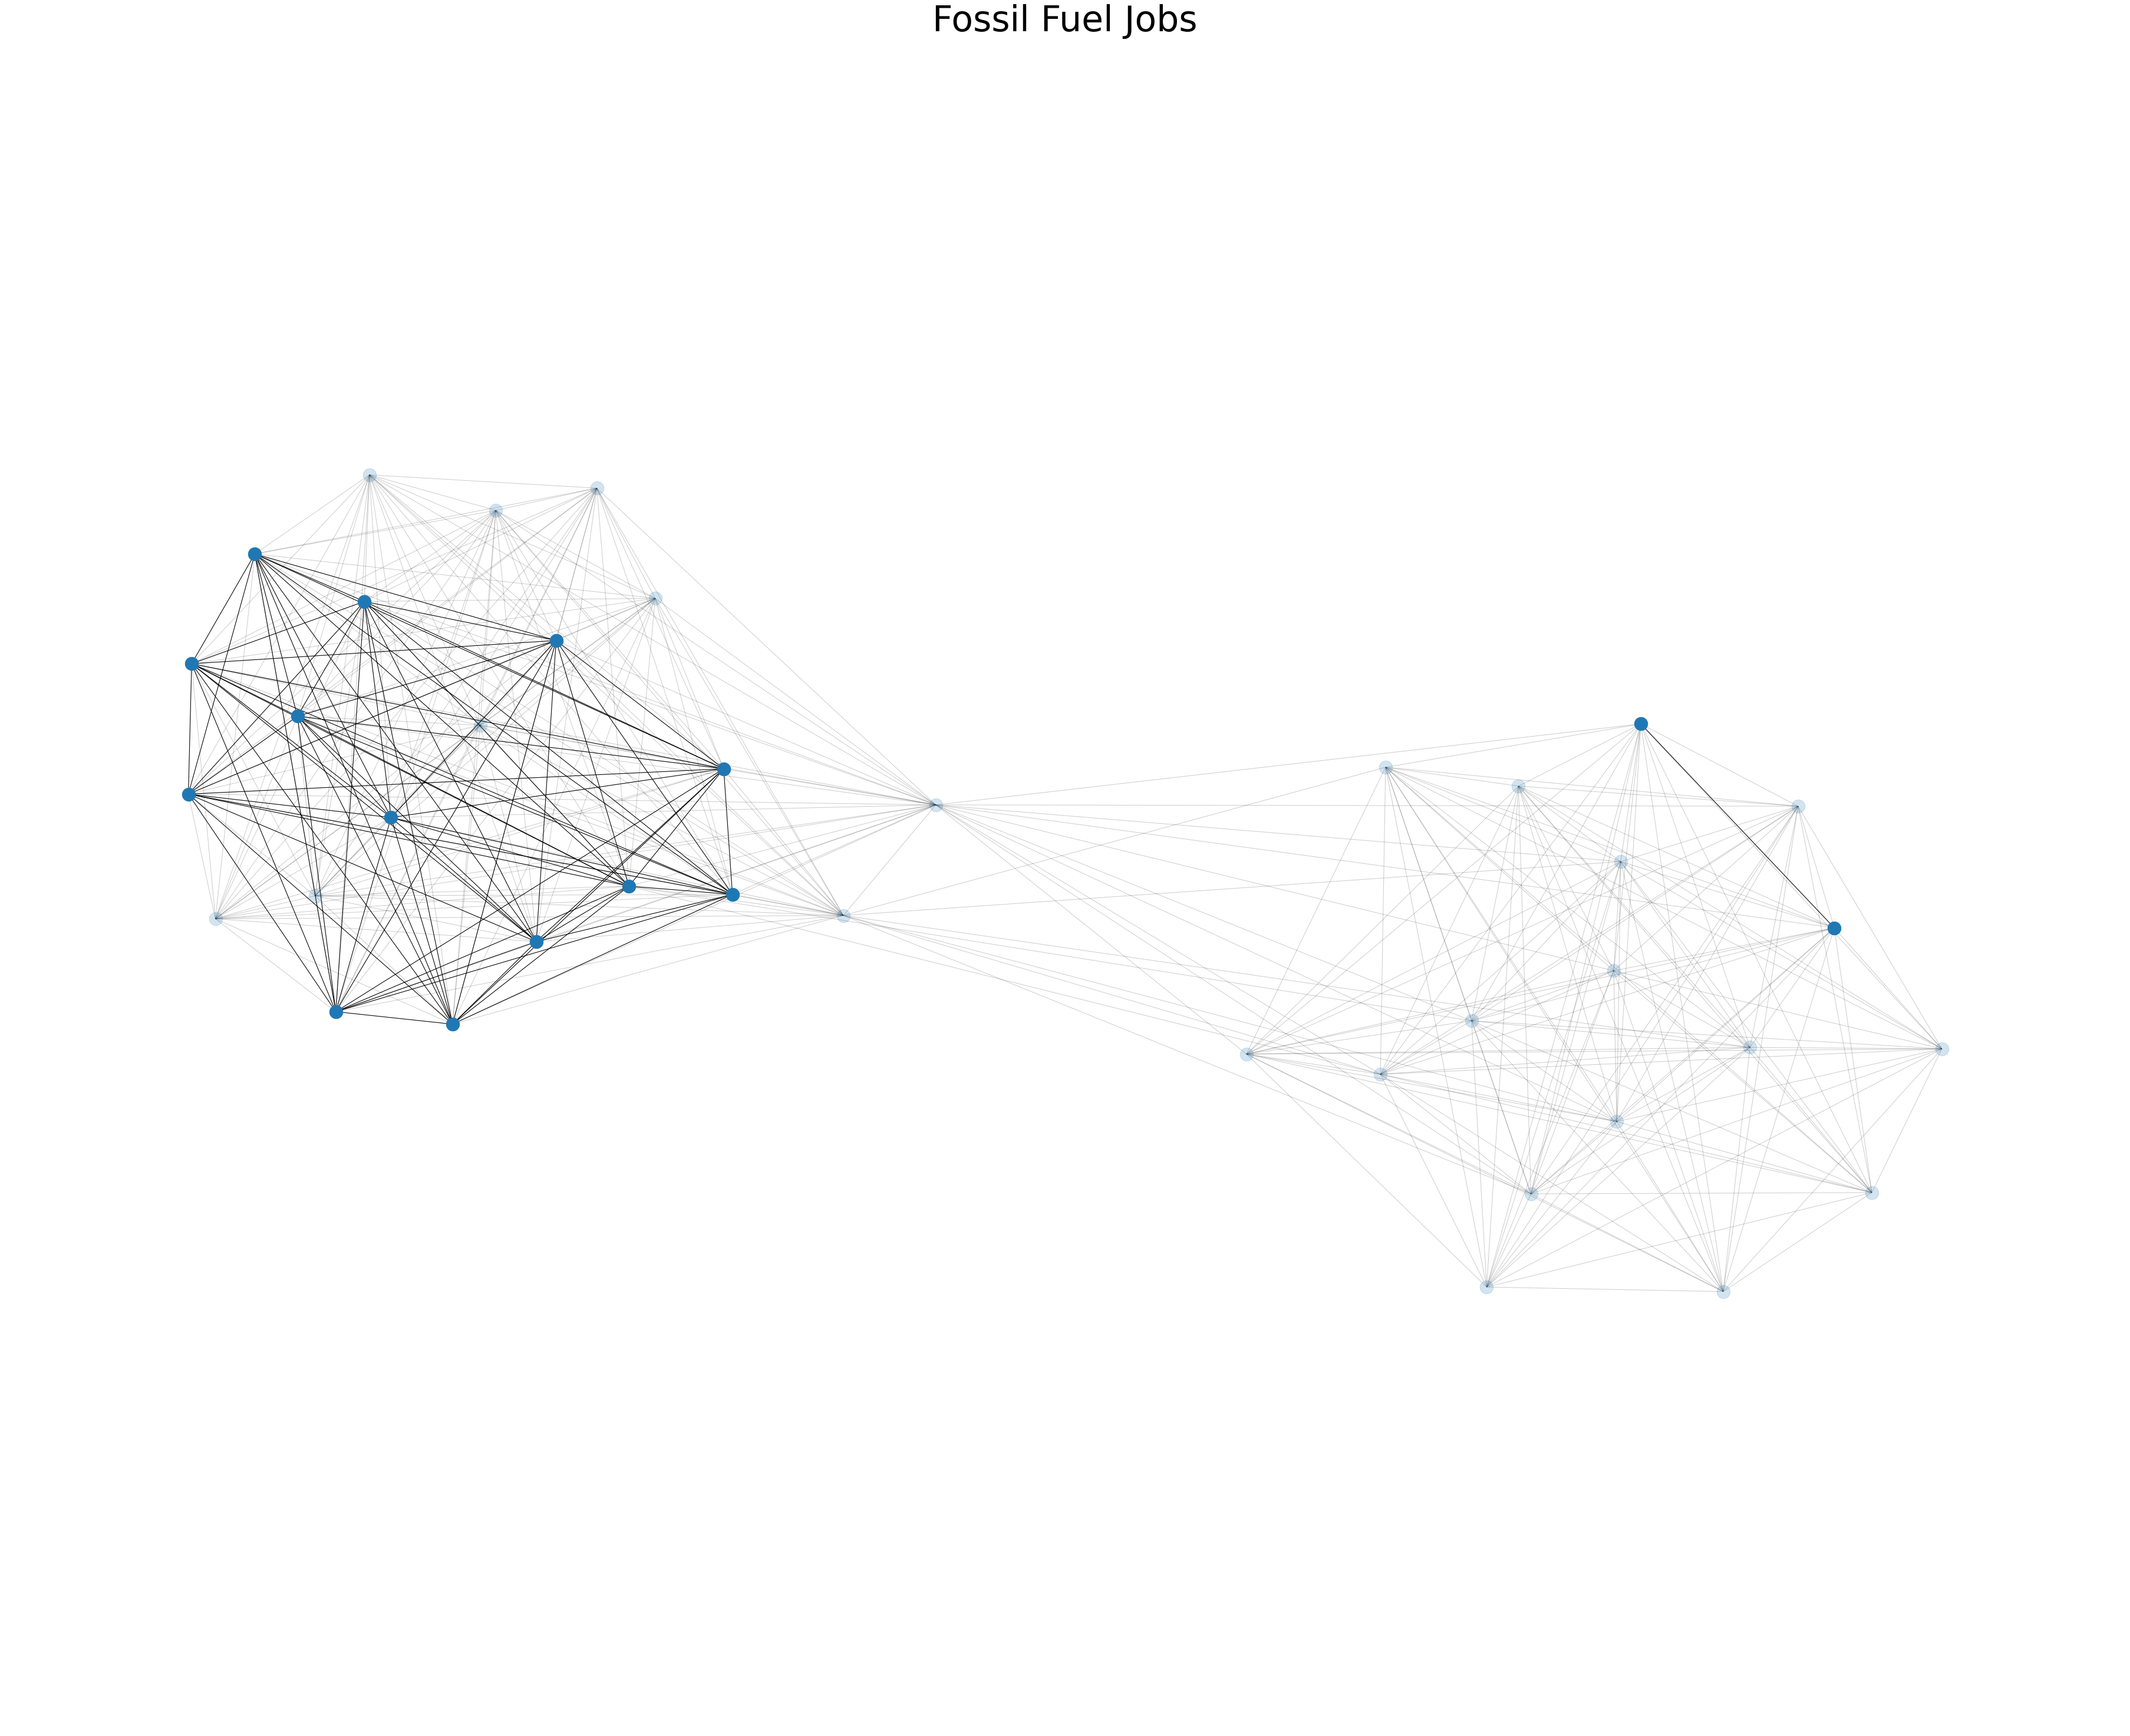

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500,  with_labels=False, font_size=30, alpha=0.2)
nx.draw(G_jobs.subgraph(jobs_list[:15]), pos=pos, node_size=500,  with_labels=False)
plt.axis('equal')
fontsize = 60
plt.title("Fossil Fuel Jobs", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('fossil_fuel_jobs.svg')

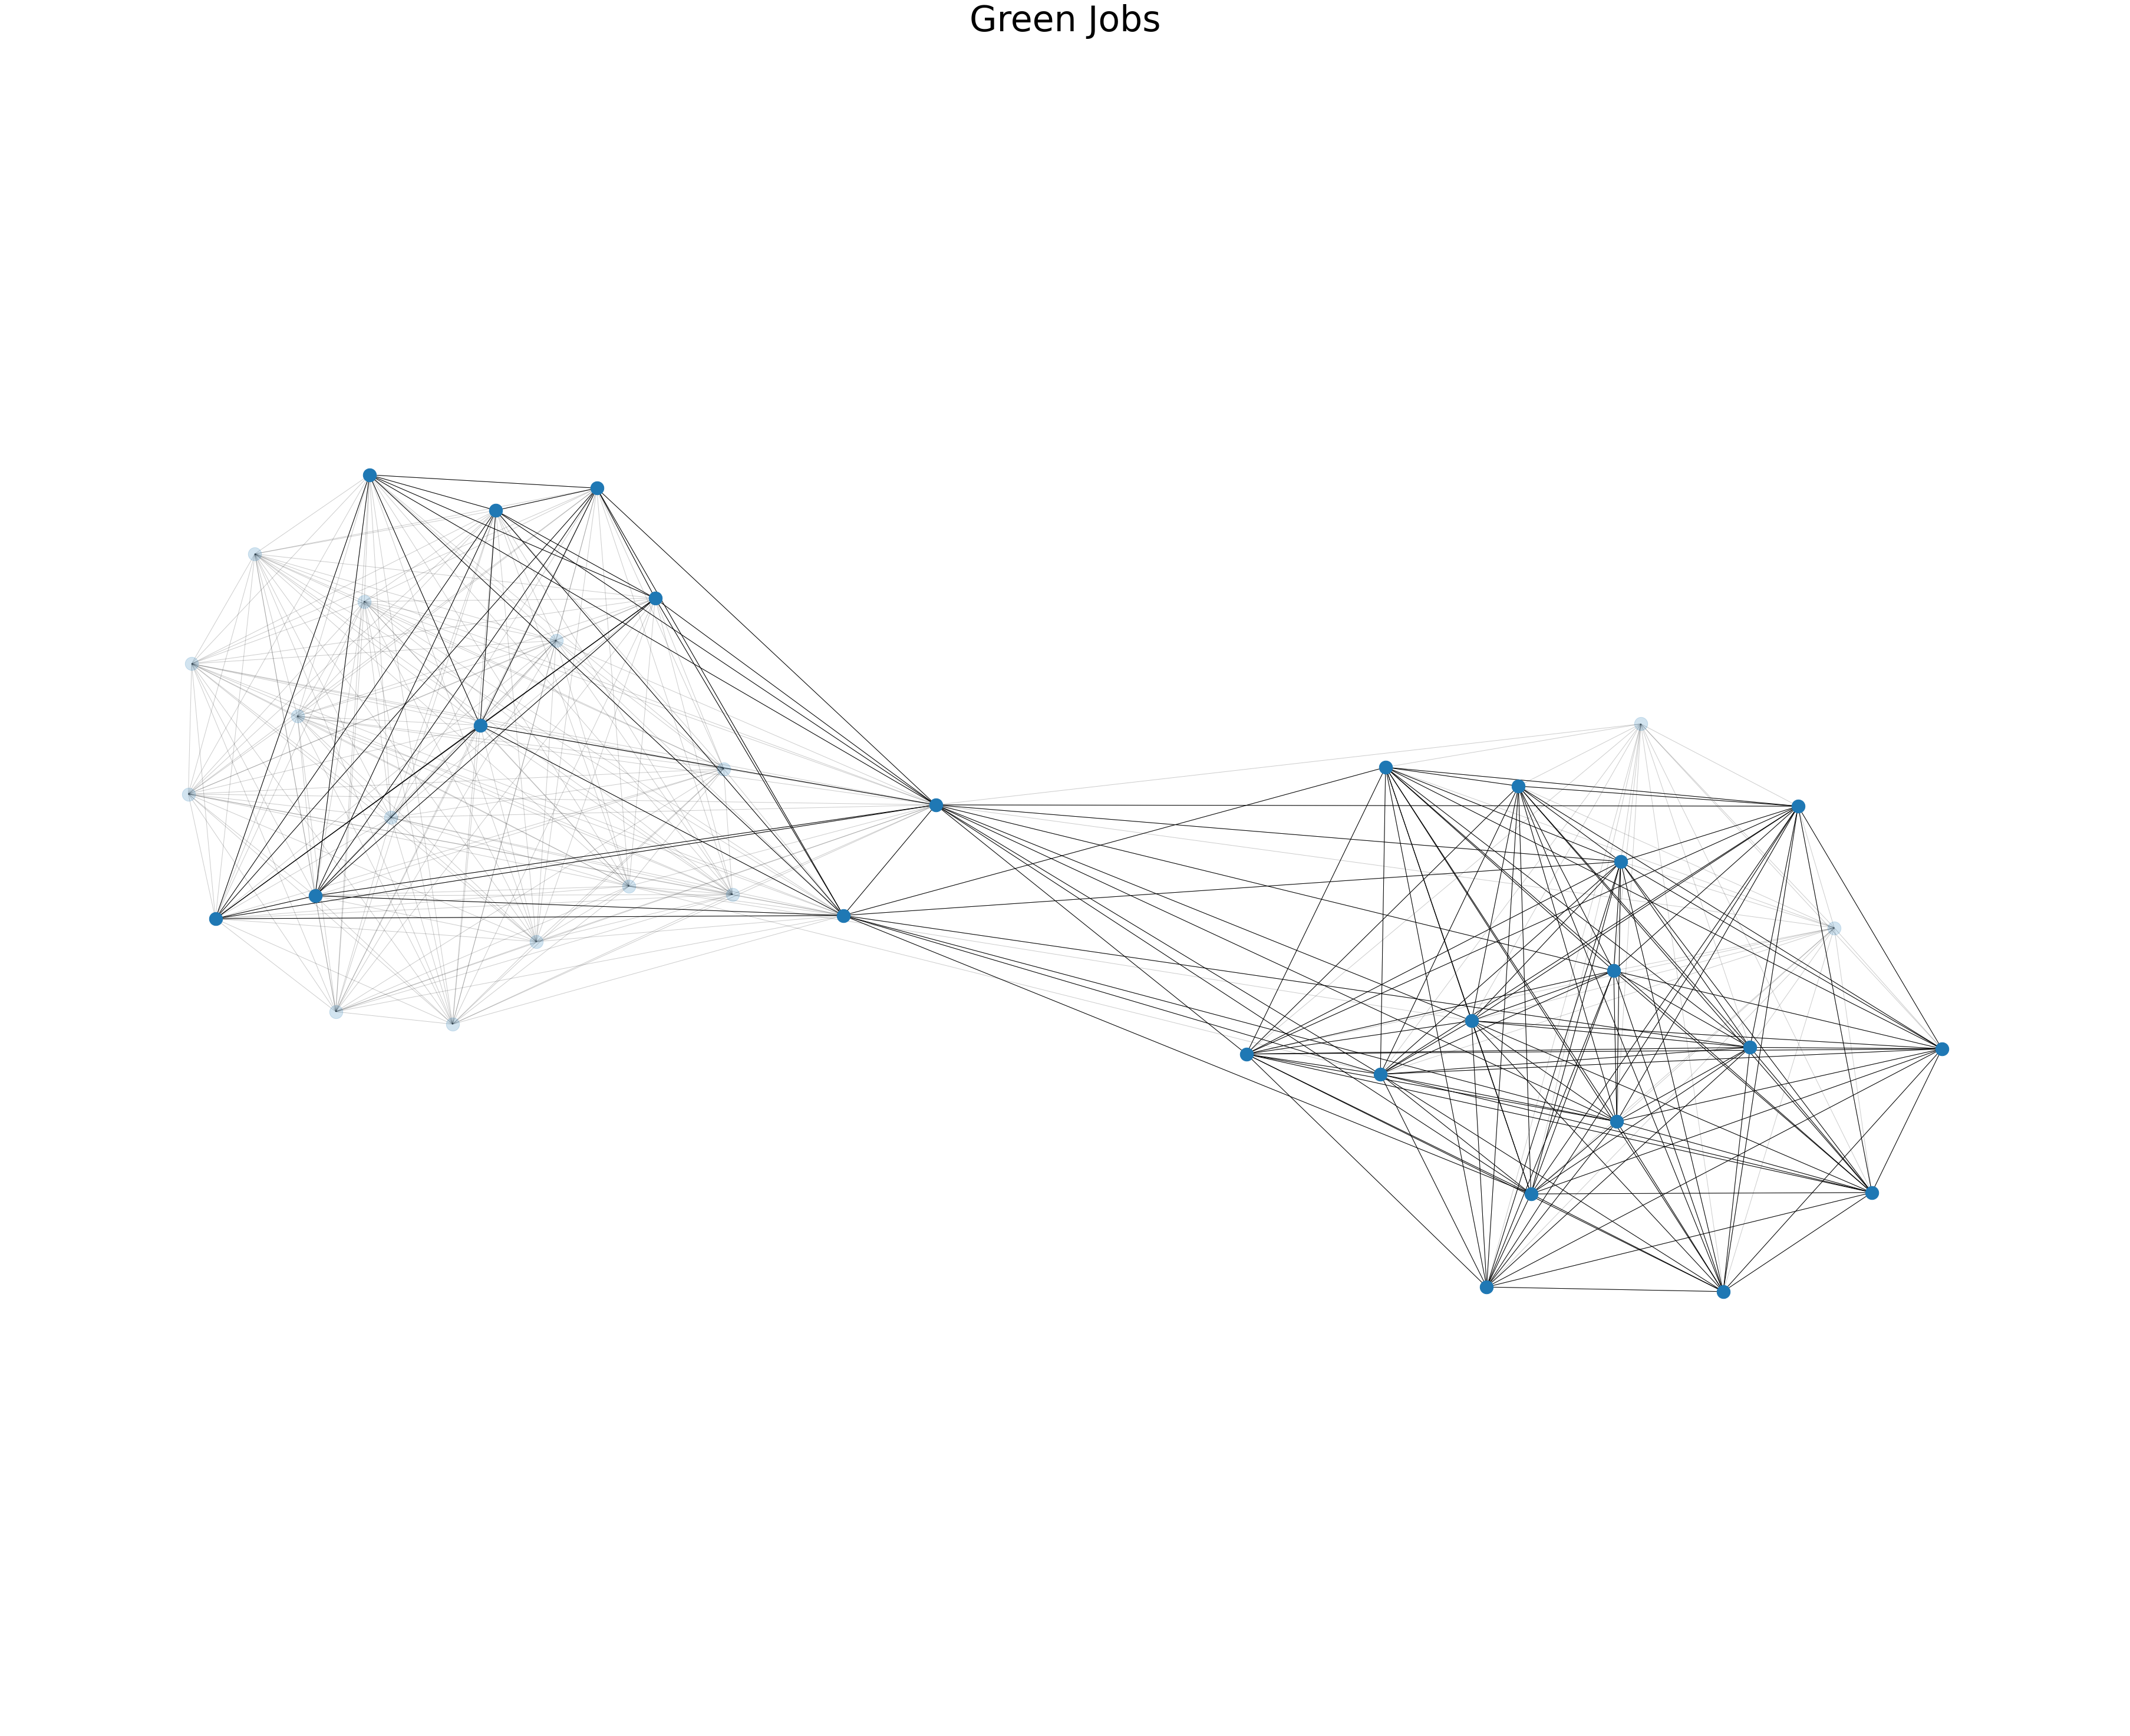

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500,  with_labels=False, font_size=30, alpha=0.2)
nx.draw(G_jobs.subgraph(jobs_list[15:]), pos=pos, node_size=500,  with_labels=False)
plt.axis('equal')
fontsize = 60
plt.title("Green Jobs", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('green_jobs.svg')

In [ ]:
G=nx.Graph()
G.add_nodes_from(keys)

In [ ]:
edges=[]
for key,value in theta_i_j.items():
  for i in range(len(value)):
    if(value[i]>=0.5):
      edges.append((key,keys[i]))

In [ ]:
# edges

In [ ]:
G.add_edges_from(edges)

In [ ]:
G.nodes()

NodeView(('Perceptual_Speed', 'Flexibility_of_Closure', 'Memorization', 'Speed_of_Closure', 'Problem_Sensitivity', 'Originality', 'Information_Ordering', 'Inductive_Reasoning', 'Fluency_of_Ideas', 'Deductive_Reasoning', 'Category_Flexibility', 'Selective_Attention', 'Time_Sharing', 'Mathematical_Reasoning', 'Number_Facility', 'Spatial_Orientation', 'Visualization', 'Oral_Comprehension', 'Oral_Expression', 'Written_Comprehension', 'Written_Expression', 'Stamina', 'Dynamic_Flexibility', 'Extent_Flexibility', 'Gross_Body_Coordination', 'Gross_Body_Equilibrium', 'Dynamic_Strength', 'Explosive_Strength', 'Static_Strength', 'Trunk_Strength', 'Control_Precision', 'Multilimb_Coordination', 'Rate_Control', 'Response_Orientation', 'Arm-Hand_Steadiness', 'Finger_Dexterity', 'Manual_Dexterity', 'Reaction_Time', 'Speed_of_Limb_Movement', 'Wrist-Finger_Speed', 'Auditory_Attention', 'Hearing_Sensitivity', 'Sound_Localization', 'Speech_Clarity', 'Speech_Recognition', 'Depth_Perception', 'Far_Vision', 

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G, seed=54111, k=0.6, iterations=25)
nx.draw(G, pos=pos, node_size=500,  with_labels=True, font_size=30)
plt.axis('equal')
fontsize = 60
plt.title("Skills Used by Fossil Fuel and Green Jobs", fontdict={'fontsize': fontsize}) 
plt.show()
fig.savefig('fossil_fuel_to_green_jobs_skills.svg')

In [ ]:
import community

In [ ]:
from community import community_louvain
partition = community_louvain.best_partition(G)

In [ ]:
partition.keys()

dict_keys(['Perceptual_Speed', 'Flexibility_of_Closure', 'Memorization', 'Speed_of_Closure', 'Problem_Sensitivity', 'Originality', 'Information_Ordering', 'Inductive_Reasoning', 'Fluency_of_Ideas', 'Deductive_Reasoning', 'Category_Flexibility', 'Selective_Attention', 'Time_Sharing', 'Mathematical_Reasoning', 'Number_Facility', 'Spatial_Orientation', 'Visualization', 'Oral_Comprehension', 'Oral_Expression', 'Written_Comprehension', 'Written_Expression', 'Stamina', 'Dynamic_Flexibility', 'Extent_Flexibility', 'Gross_Body_Coordination', 'Gross_Body_Equilibrium', 'Dynamic_Strength', 'Explosive_Strength', 'Static_Strength', 'Trunk_Strength', 'Control_Precision', 'Multilimb_Coordination', 'Rate_Control', 'Response_Orientation', 'Arm-Hand_Steadiness', 'Finger_Dexterity', 'Manual_Dexterity', 'Reaction_Time', 'Speed_of_Limb_Movement', 'Wrist-Finger_Speed', 'Auditory_Attention', 'Hearing_Sensitivity', 'Sound_Localization', 'Speech_Clarity', 'Speech_Recognition', 'Depth_Perception', 'Far_Vision',

In [ ]:
partition

{'Perceptual_Speed': 0,
 'Flexibility_of_Closure': 0,
 'Memorization': 0,
 'Speed_of_Closure': 0,
 'Problem_Sensitivity': 0,
 'Originality': 0,
 'Information_Ordering': 0,
 'Inductive_Reasoning': 0,
 'Fluency_of_Ideas': 0,
 'Deductive_Reasoning': 0,
 'Category_Flexibility': 0,
 'Selective_Attention': 0,
 'Time_Sharing': 0,
 'Mathematical_Reasoning': 0,
 'Number_Facility': 0,
 'Spatial_Orientation': 1,
 'Visualization': 0,
 'Oral_Comprehension': 0,
 'Oral_Expression': 0,
 'Written_Comprehension': 0,
 'Written_Expression': 0,
 'Stamina': 1,
 'Dynamic_Flexibility': 2,
 'Extent_Flexibility': 1,
 'Gross_Body_Coordination': 1,
 'Gross_Body_Equilibrium': 1,
 'Dynamic_Strength': 1,
 'Explosive_Strength': 1,
 'Static_Strength': 1,
 'Trunk_Strength': 1,
 'Control_Precision': 1,
 'Multilimb_Coordination': 1,
 'Rate_Control': 1,
 'Response_Orientation': 1,
 'Arm-Hand_Steadiness': 1,
 'Finger_Dexterity': 1,
 'Manual_Dexterity': 1,
 'Reaction_Time': 1,
 'Speed_of_Limb_Movement': 1,
 'Wrist-Finger_Sp

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G, seed=54111, k=0.6, iterations=25)
nx.draw(G, pos=pos, node_size=600, node_color=list(partition.values()), with_labels=False)
plt.axis('equal') 
plt.show()
fig.savefig('Louvain_skills.svg')

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G, seed=54111, k=0.6, iterations=25)
nx.draw(G, pos=pos, node_size=600, node_color=list(partition.values()), with_labels=True, font_size=35, alpha=0.8)
plt.axis('equal') 
plt.show()
fig.savefig('Louvain_skills_with_label.svg')

In [ ]:
keys=list(e_j_s.keys())

In [ ]:
e_j_s['Perceptual_Speed'][3]

1

In [ ]:
occupation_use_skills={}
for job_num in range(len(jobs_list)):
  skills_list=[]
  for key in keys:
    if e_j_s[key][job_num]==1:
      skills_list.append(key)
  occupation_use_skills[jobs_list[job_num]]=skills_list

In [ ]:
len(occupation_use_skills.keys())

39

In [ ]:
occupation_use_skills['Hydroelectric Production Managers']

['Perceptual_Speed',
 'Flexibility_of_Closure',
 'Memorization',
 'Speed_of_Closure',
 'Problem_Sensitivity',
 'Originality',
 'Information_Ordering',
 'Inductive_Reasoning',
 'Fluency_of_Ideas',
 'Deductive_Reasoning',
 'Category_Flexibility',
 'Selective_Attention',
 'Time_Sharing',
 'Mathematical_Reasoning',
 'Number_Facility',
 'Spatial_Orientation',
 'Visualization',
 'Oral_Comprehension',
 'Oral_Expression',
 'Written_Comprehension',
 'Written_Expression',
 'Reaction_Time',
 'Wrist-Finger_Speed',
 'Auditory_Attention',
 'Sound_Localization',
 'Speech_Clarity',
 'Speech_Recognition',
 'Glare_Sensitivity',
 'Night_Vision',
 'Peripheral_Vision',
 'Visual_Color_Discrimination']

In [ ]:
jobs_list

In [ ]:
for i in range(0,15):
  fig = plt.figure(figsize=(50, 40)) 
  pos = nx.spring_layout(G, seed=54111, k=0.6, iterations=25)
  nx.draw(G, pos=pos, node_size=500,  with_labels=False, font_size=30, alpha=0.2)
  nx.draw(G.subgraph(occupation_use_skills[jobs_list[i]]), pos=pos, node_size=500,  with_labels=False)
  plt.axis('equal')
  fontsize = 60
  plt.title(jobs_list[i], fontdict={'fontsize': fontsize}) 
  plt.show()
  # fig.savefig('fossil_fuel_to_green_jobs_skills.svg')

In [ ]:
for i in range(15,39):
  fig = plt.figure(figsize=(50, 40)) 
  pos = nx.spring_layout(G, seed=54111, k=0.6, iterations=25)
  nx.draw(G, pos=pos, node_size=500,  with_labels=False, font_size=30, alpha=0.2)
  nx.draw(G.subgraph(occupation_use_skills[jobs_list[i]]), pos=pos, node_size=500,  with_labels=False)
  plt.axis('equal')
  fontsize = 60
  plt.title(jobs_list[i], fontdict={'fontsize': fontsize}) 
  plt.show()
  # fig.savefig('fossil_fuel_to_green_jobs_skills.svg')

In [ ]:
for i in range(34,39):
  fig = plt.figure(figsize=(50, 40)) 
  pos = nx.spring_layout(G, seed=54111, k=0.6, iterations=25)
  nx.draw(G, pos=pos, node_size=500,  with_labels=False, font_size=30, alpha=0.2)
  nx.draw(G.subgraph(occupation_use_skills[jobs_list[i]]), pos=pos, node_size=500,  with_labels=False)
  plt.axis('equal')
  fontsize = 60
  plt.title(jobs_list[i], fontdict={'fontsize': fontsize}) 
  plt.show()
  # fig.savefig('fossil_fuel_to_green_jobs_skills.svg')

In [ ]:
!pip install stellargraph

In [ ]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

from gensim.models import Word2Vec

import warnings
import collections
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import multiprocessing

%matplotlib inline

In [ ]:
len(G_jobs.edges())

385

In [ ]:
eta_i_j['Rotary Drill Operators, Oil and Gas']

array([0.        , 0.78571429, 0.875     , 0.        , 0.88      ,
       0.69230769, 0.74074074, 0.81481481, 0.73076923, 0.73913043,
       0.        , 0.8       , 0.74074074, 0.84      , 0.75      ,
       0.67741935, 0.14285714, 0.73076923, 0.11538462, 0.76923077,
       0.10714286, 0.07692308, 0.03703704, 0.48      , 0.21212121,
       0.24137931, 0.        , 0.68181818, 0.08333333, 0.08333333,
       0.58333333, 0.81818182, 0.16666667, 0.04      , 0.08      ,
       0.8       , 0.        , 0.19354839, 0.82608696])

In [ ]:
jobs_list[0]

'Rotary Drill Operators, Oil and Gas'

In [ ]:
len(jobs_list)

39

In [ ]:
source=[]
target=[]
value=[]
for i in range(len(jobs_list)):
  for j in range(i+1, len(jobs_list)):
    if eta_i_j[jobs_list[i]][j]>0:
      source.append(jobs_list[i])
      target.append(jobs_list[j])
      value.append(eta_i_j[jobs_list[i]][j])

In [ ]:
data = {'source': source,
      'target': target,
      'weight': value}
df_jobs = pd.DataFrame(data)

In [ ]:
df_jobs

In [ ]:
stellar_G = StellarGraph(edges=df_jobs)
print(stellar_G.info())

StellarGraph: Undirected multigraph
 Nodes: 39, Edges: 723

 Node types:
  default: [39]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [723]
        Weights: range=[0.0357143, 1], mean=0.480812, std=0.303205
        Features: none


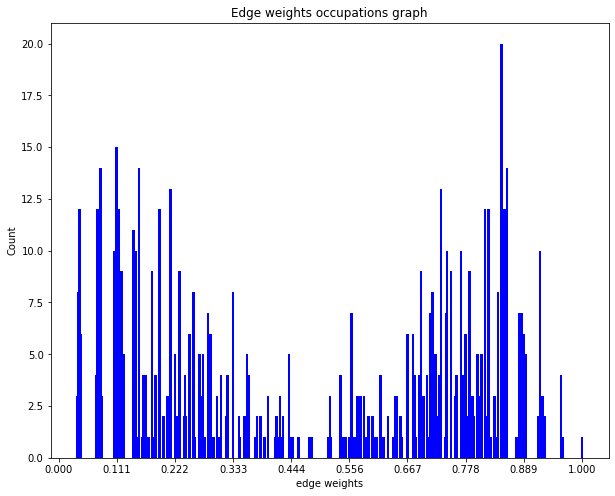

In [ ]:
_, weights = stellar_G.edges(include_edge_weight=True)

wt, cnt = np.unique(weights, return_counts=True)

plt.figure(figsize=(10, 8))
plt.bar(wt, cnt, width=0.005, color="b")
plt.title("Edge weights occupations graph")
plt.ylabel("Count")
plt.xlabel("edge weights")
plt.xticks(np.linspace(0, 1, 10))

plt.show()

In [ ]:
walk_length = 500

In [ ]:
rw = BiasedRandomWalk(stellar_G)

In [ ]:
weighted_walks = rw.run(
    nodes=stellar_G.nodes(),  
    length=walk_length,  
    n=100,  
    p=1,  
    q=0.5,  
    weighted=True,  
    seed=42,  
)
print("Number of random walks: {}".format(len(weighted_walks)))

Number of random walks: 3900


In [ ]:
weighted_walks1 = rw.run(
    nodes=stellar_G.nodes(),  
    length=walk_length,  
    n=100,  
    p=0.3,  
    q=4,  
    weighted=True,  
    seed=42,  
)
print("Number of random walks: {}".format(len(weighted_walks)))

Number of random walks: 3900


In [ ]:
weighted_model = Word2Vec(
    weighted_walks, size=1024, window=5, min_count=0, sg=1, workers = 1, iter=1
)

In [ ]:
weighted_model1 = Word2Vec(
    weighted_walks1, size=1024, window=5, min_count=0, sg=1, workers = 1, iter=1
)

In [ ]:
jobs_list

In [ ]:
emb = weighted_model.wv['Rotary Drill Operators, Oil and Gas']
print(emb.shape)
print(emb)

(1024,)
[ 0.00944027 -0.00147957 -0.05383601 ... -0.01187107 -0.0079139
  0.04390134]


In [ ]:
a=weighted_model.wv['Rotary Drill Operators, Oil and Gas']
a

array([ 0.00944027, -0.00147957, -0.05383601, ..., -0.01187107,
       -0.0079139 ,  0.04390134], dtype=float32)

In [ ]:
weighted_node_embeddings = []

In [ ]:
for i in jobs_list:
  a=weighted_model.wv[i]
  list_a=[]
  for i in a:
    list_a.append(i)
  weighted_node_embeddings.append(list_a)
  # weighted_node_embeddings.append(list(weighted_model.wv[i]))

In [ ]:
weighted_node_embeddings1 = []

In [ ]:
for i in jobs_list:
  a=weighted_model1.wv[i]
  list_a=[]
  for i in a:
    list_a.append(i)
  weighted_node_embeddings1.append(list_a)
  # weighted_node_embeddings.append(list(weighted_model.wv[i]))

In [ ]:
weighted_node_embeddings[0]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(weighted_node_embeddings)

KMeans(n_clusters=2)

In [ ]:
labels_jobs_2=Kmean.labels_
len(labels_jobs_2)

39

In [ ]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(weighted_node_embeddings)
labels_jobs_3=Kmean.labels_
len(labels_jobs_3)
partition_jobs_3={}
for i in range(len(jobs_list)):
  partition_jobs_3[jobs_list[i]]=labels_jobs_3[i]

In [ ]:
Kmean = KMeans(n_clusters=4)
Kmean.fit(weighted_node_embeddings)
labels_jobs_4=Kmean.labels_
len(labels_jobs_4)
partition_jobs_4={}
for i in range(len(jobs_list)):
  partition_jobs_4[jobs_list[i]]=labels_jobs_4[i]

In [ ]:
partition_jobs={}
for i in range(len(jobs_list)):
  partition_jobs[jobs_list[i]]=labels_jobs_2[i]

In [ ]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(weighted_node_embeddings1)
labels_jobs_2_pq=Kmean.labels_
len(labels_jobs_2_pq)
partition_jobs_2_pq={}
for i in range(len(jobs_list)):
  partition_jobs_2_pq[jobs_list[i]]=labels_jobs_2_pq[i]

In [ ]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(weighted_node_embeddings1)
labels_jobs_3_pq=Kmean.labels_
len(labels_jobs_3_pq)
partition_jobs_3_pq={}
for i in range(len(jobs_list)):
  partition_jobs_3_pq[jobs_list[i]]=labels_jobs_3_pq[i]

In [ ]:
Kmean = KMeans(n_clusters=4)
Kmean.fit(weighted_node_embeddings1)
labels_jobs_4_pq=Kmean.labels_
len(labels_jobs_4_pq)
partition_jobs_4_pq={}
for i in range(len(jobs_list)):
  partition_jobs_4_pq[jobs_list[i]]=labels_jobs_4_pq[i]

In [ ]:
partition_jobs_4_pq

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500, node_color=list(partition_jobs.values()), with_labels=True, font_size=30)
plt.axis('equal')
fontsize = 60
plt.title("fossil fuel jobs and green jobs", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('jobs.svg')

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500, node_color=list(partition_jobs_3.values()), with_labels=True, font_size=30)
plt.axis('equal')
fontsize = 60
plt.title("fossil fuel jobs and green jobs 3", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('jobs3.svg')

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500, node_color=list(partition_jobs_4.values()), with_labels=True, font_size=30)
plt.axis('equal')
fontsize = 60
plt.title("fossil fuel jobs and green jobs 4", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('jobs4.svg')

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500, node_color=list(partition_jobs_2_pq.values()), with_labels=True, font_size=30)
plt.axis('equal')
fontsize = 60
plt.title("fossil fuel jobs and green jobs 4", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('jobs4.svg')

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500, node_color=list(partition_jobs_3_pq.values()), with_labels=True, font_size=30)
plt.axis('equal')
fontsize = 60
plt.title("fossil fuel jobs and green jobs 4", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('jobs4.svg')

In [ ]:
partition_jobs_4_pq

In [ ]:
fig = plt.figure(figsize=(50, 40)) 
pos = nx.spring_layout(G_jobs, seed=5411, k=0.6, iterations=25)
nx.draw(G_jobs, pos=pos, node_size=500, node_color=list(partition_jobs_4_pq.values()), with_labels=True, font_size=30)
plt.axis('equal')
fontsize = 60
plt.title("fossil fuel jobs and green jobs 4", fontdict={'fontsize': fontsize})
plt.show()
fig.savefig('jobs4.svg')

In [ ]:
!ls

ffai_us_job_transitions_per_year_counts.gzip  jobs.svg
fossil_fuel.xlsx			      skills_jobs_csv


In [ ]:
# %cd Network Final Project

In [ ]:
transition_df = pd.read_csv("ffai_us_job_transitions_per_year_counts.gzip", compression="gzip")
transition_df

In [ ]:
transition_df.loc[[900]]

S_Soc    D_Soc  Date  Counts
900  11-2022  11-2021  2018     456

In [ ]:
jobs_list

In [ ]:
jobs_list_code=['47-5012','47-5071','47-5013','17-2171','47-5011','51-8093','53-7073','53-7072','51-8092',
        '53-7071','17-2199','51-9021','47-5041','47-5044','53-5011','49-9099','11-3051','51-8013',
        '11-3051','51-8099','11-3051','11-9041','17-2161','19-4051','51-8011','19-4051','19-3011',
        '47-2152','17-2199','41-4011','47-1011','47-2231','11-9199','11-9199','17-2199','49-9081',
        '13-1199','11-3051','51-8013']

In [ ]:
len(jobs_list_code)

39

In [ ]:
subset=(transition_df.loc[transition_df['S_Soc'].isin(jobs_list_code) & transition_df['D_Soc'].isin(jobs_list_code)]).copy()

In [ ]:
subset

In [ ]:
subset=subset.loc[(subset['Date'] > 2009) & (subset['Date'] < 2019)]

In [ ]:
subset

In [ ]:
subset=subset.reset_index()

In [ ]:
subset=subset.drop('index', axis=1)

In [ ]:
subset

In [ ]:
for i,row in subset.iterrows():
  if subset['S_Soc'][i]==subset['D_Soc'][i]:
    subset.drop(i)

In [ ]:
subset=subset[subset['S_Soc'] != subset['D_Soc']]

In [ ]:
subset=subset.reset_index()

In [ ]:
subset=subset.drop('index', axis=1)

In [ ]:
subset=subset.drop('Date', axis=1)

In [ ]:
subset=subset[subset['S_Soc'] != '11-9041']
subset=subset[subset['D_Soc'] != '11-9041']
subset=subset.reset_index()
subset=subset.drop('index', axis=1)

In [ ]:
subset=subset[subset['S_Soc'] != '11-9199']
subset=subset[subset['D_Soc'] != '11-9199']
subset=subset.reset_index()
subset=subset.drop('index', axis=1)

In [ ]:
subset=subset[subset['S_Soc'] != '41-4011']
subset=subset[subset['D_Soc'] != '41-4011']
subset=subset.reset_index()
subset=subset.drop('index', axis=1)

In [ ]:
subset=subset[subset['S_Soc'] != '47-1011']
subset=subset[subset['D_Soc'] != '47-1011']
subset=subset.reset_index()
subset=subset.drop('index', axis=1)

In [ ]:
subset=subset[subset['S_Soc'] != '17-2199']
subset=subset[subset['D_Soc'] != '17-2199']
subset=subset.reset_index()
subset=subset.drop('index', axis=1)

In [ ]:
subset=subset[subset['S_Soc'] != '19-3011']
subset=subset[subset['D_Soc'] != '19-3011']
subset=subset.reset_index()
subset=subset.drop('index', axis=1)

In [ ]:
subset=subset[subset['S_Soc'] != '47-2152']
subset=subset[subset['D_Soc'] != '47-2152']
subset=subset.reset_index()
subset=subset.drop('index', axis=1)

In [ ]:
subset=subset.reset_index()

In [ ]:
subset=subset.drop('index', axis=1)

In [ ]:
subset

In [ ]:
num=len(subset)
num

320

In [ ]:
subset.loc[0,'S_Soc']
# subset_new.loc[0,'S_Soc']

'47-5012'

In [ ]:
subset

In [ ]:
list_s=[]
for i in range(len(subset)):
  list_s.append(subset['S_Soc'][i])
for i in range(len(subset)):
  list_s.append(subset['D_Soc'][i])
nodes=np.unique(list_s)
nodes

array(['11-3051', '17-2161', '17-2171', '19-4051', '47-2231', '47-5012',
       '47-5013', '47-5041', '47-5044', '47-5071', '49-9081', '51-8011',
       '51-8013', '51-8092', '51-8093', '51-8099', '53-5011', '53-7071',
       '53-7072', '53-7073'], dtype='<U7')

In [ ]:
len(nodes)

20

In [ ]:
resume_dict={}
for i in range(len(nodes)):
  row_i=np.zeros(len(nodes))
  for j in range(i+1,len(nodes)):
    count=0
    for z in range(len(subset)):
      if subset['S_Soc'][z]==nodes[i] and subset['D_Soc'][z]==nodes[j]:
        count+=subset['Counts'][z]
      if subset['S_Soc'][z]==nodes[j] and subset['D_Soc'][z]==nodes[i]:
        count+=subset['Counts'][z]
    row_i[j]=count
  resume_dict[nodes[i]]=row_i

In [ ]:
resume_dict

In [ ]:
len(list(resume_dict.keys()))

20

In [ ]:
len(resume_dict['51-8013'])

20

In [ ]:
S_Soc=[]
D_Soc=[]
count=[]
list_keys=list(resume_dict.keys())
for i in range(len(list_keys)):
  for j in range(len(list_keys)):
    if resume_dict[list_keys[i]][j]!=0:
      S_Soc.append(list_keys[i])
      D_Soc.append(list_keys[j])
      count.append(resume_dict[list_keys[i]][j])


In [ ]:
dict1 = {'S_Soc': S_Soc, 'D_Soc': D_Soc, 'count': count} 
 
resume_transition = pd.DataFrame(dict1)

In [ ]:
resume_transition

In [ ]:
resume_transition=resume_transition[resume_transition['S_Soc'] != '11-3051']
resume_transition=resume_transition[resume_transition['D_Soc'] != '11-3051']
resume_transition=resume_transition.reset_index()
resume_transition=resume_transition.drop('index', axis=1)

In [ ]:
resume_transition

In [ ]:
dict_code_name={}
for i in range(len(jobs_list_code)):
  dict_code_name[jobs_list_code[i]]=jobs_list[i]

In [ ]:
for i in range(len(resume_transition)):
  name1=resume_transition['S_Soc'][i]
  name2=resume_transition['D_Soc'][i]
  resume_transition['S_Soc'][i]=dict_code_name[name1]
  resume_transition['D_Soc'][i]=dict_code_name[name2]

<ipython-input-1043-4666a30b31c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_transition['S_Soc'][i]=dict_code_name[name1]
<ipython-input-1043-4666a30b31c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_transition['D_Soc'][i]=dict_code_name[name2]


In [ ]:
resume_transition

S_Soc  \
0                                   Nuclear Engineers   
1                                   Nuclear Engineers   
2                                   Nuclear Engineers   
3                                   Nuclear Engineers   
4                                   Nuclear Engineers   
5                                   Nuclear Engineers   
6                                 Petroleum Engineers   
7                                 Petroleum Engineers   
8                                 Petroleum Engineers   
9                                 Petroleum Engineers   
10                                Petroleum Engineers   
11                                Petroleum Engineers   
12                                Petroleum Engineers   
13                                Petroleum Engineers   
14                                Petroleum Engineers   
15                                Petroleum Engineers   
16                                Petroleum Engineers   
17                     Nuclear Monitoring Technicians   
18                     Nuclear Monitoring Technicians   
19                     Nuclear Monitoring Technicians   
20                     Nuclear Monitoring Technicians   
21                      Solar Photovoltaic Installers   
22                      Solar Photovoltaic Installers   
23                Rotary Drill Operators, Oil and Gas   
24                Rotary Drill Operators, Oil and Gas   
25                Rotary Drill Operators, Oil and Gas   
26                Rotary Drill Operators, Oil and Gas   
27                Rotary Drill Operators, Oil and Gas   
28                Rotary Drill Operators, Oil and Gas   
29                Service Unit Operators, Oil and Gas   
30                Service Unit Operators, Oil and Gas   
31                Service Unit Operators, Oil and Gas   
32                Continuous Mining Machine Operators   
33  Loading and Moving Machine Operators, Undergro...   
34  Loading and Moving Machine Operators, Undergro...   
35  Loading and Moving Machine Operators, Undergro...   
36                           Roustabouts, Oil and Gas   
37                           Roustabouts, Oil and Gas   
38                   Wind Turbine Service Technicians   
39                   Wind Turbine Service Technicians   
40                   Wind Turbine Service Technicians   
41                   Wind Turbine Service Technicians   
42                    Nuclear Power Reactor Operators   
43                    Nuclear Power Reactor Operators   
44                    Nuclear Power Reactor Operators   
45                    Hydroelectric Plant Technicians   
46                    Hydroelectric Plant Technicians   
47                    Hydroelectric Plant Technicians   
48                    Hydroelectric Plant Technicians   
49                                Gas Plant Operators   
50                                Gas Plant Operators   
51                                Gas Plant Operators   
52  Petroleum Pump System Operators, Refinery Oper...   
53  Petroleum Pump System Operators, Refinery Oper...   
54  Petroleum Pump System Operators, Refinery Oper...   
55            Pump Operators, Except Wellhead Pumpers   

                                                D_Soc  count  
0                      Nuclear Monitoring Technicians   18.0  
1                    Wind Turbine Service Technicians    3.0  
2                     Nuclear Power Reactor Operators  115.0  
3                     Hydroelectric Plant Technicians    6.0  
4                                 Gas Plant Operators    3.0  
5                           Sailors and Marine Oilers    3.0  
6                      Nuclear Monitoring Technicians    1.0  
7                       Solar Photovoltaic Installers    1.0  
8                 Rotary Drill Operators, Oil and Gas  141.0  
9                 Service Unit Operators, Oil and Gas   12.0  
10                           Roustabouts, Oil and Gas    6.0  
11                   Wind Turbine Service 

In [ ]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(a,b):
  cos_sim = dot(a, b)/(norm(a)*norm(b))
  return cos_sim

In [ ]:
a=weighted_model.wv['Rotary Drill Operators, Oil and Gas']

In [ ]:
b=weighted_model.wv['Gas Plant Operators']

In [ ]:
score=cos_sim(a,b)
score

0.8896638

In [ ]:
c=weighted_model.wv['Petroleum Engineers']

In [ ]:
d=weighted_model.wv['Rotary Drill Operators, Oil and Gas']

In [ ]:
score=cos_sim(c,d)
score

0.33061278

In [ ]:
jobs_list

In [ ]:
similarity_score=[]
for i in range(len(resume_transition)):
  a=weighted_model.wv[resume_transition['S_Soc'][i]]
  b=weighted_model.wv[resume_transition['D_Soc'][i]]
  similarity_score.append(cos_sim(a,b))

In [ ]:
len(similarity_score)

56

In [ ]:
count_transition=[]
for i in range(len(resume_transition)):
  count_transition.append(resume_transition['count'][i])
len(count_transition)

56

In [ ]:
count_transition

In [ ]:
len(similarity_score)

56

In [ ]:
similarity_score_pow=[i**10 for i in similarity_score]

In [ ]:
resume_transition['similarity']=similarity_score

In [ ]:
resume_transition

In [ ]:
from scipy.stats.stats import pearsonr
print(pearsonr(similarity_score,count_transition))

(-0.15792960906773404, 0.24503478242875829)


In [ ]:
from scipy.stats.stats import pearsonr
print(pearsonr(similarity_score_pow,count_transition))

(-0.12264952732896642, 0.367838023018368)


In [ ]:
pd.set_option('display.max_rows', 1100)